In [172]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [173]:
# Read each file
crime_2017 = "Resources/Police_Incidents_2017.csv"
crime_2018_p1 = "Resources/Police_Incidents_2018.csv"
crime_2018_p2 = "Resources/Police_Incidents_2018_PIMS.csv"
crime_2019 = "Resources/Police_Incidents_2019.csv"

# Load each years crime data, and clean up column names

In [175]:
# Push each file into a DataFrame
crime_2017_df = pd.read_csv(crime_2017, encoding="ISO-8859-1")
crime_2018_p1_df = pd.read_csv(crime_2018_p1, encoding="ISO-8859-1")
crime_2018_p2_df = pd.read_csv(crime_2018_p2, encoding="ISO-8859-1")
crime_2019_df = pd.read_csv(crime_2019, encoding="ISO-8859-1")

# Drop unnecessary columns
crime_2017_df = crime_2017_df.drop(columns={"ï»¿PublicAddress", "ControlNbr",
                                                "Precinct", "BeginDate", "Time",
                                                 "EnteredDate", "GBSID", "Lat", 
                                                  "Long", "X", "Y", "Neighborhood",
                                                 "LastChanged", "LastUpdateDate",
                                                 "OBJECTID","Description"})
crime_2018_p1_df = crime_2018_p1_df.drop(columns={"ï»¿PublicAddress", "ControlNbr",
                                                "Precinct", "BeginDate", "Time",
                                                 "EnteredDate", "GBSID", "Lat", 
                                                  "Long", "X", "Y", "Neighborhood",
                                                 "LastChanged", "LastUpdateDate",
                                                 "OBJECTID","Description"})

crime_2018_p2_df = crime_2018_p2_df.drop(columns={"ï»¿X", "Y", "publicaddress",
                                                  "precinct", "reportedTime", 
                                                 "beginDate", "beginTime",
                                                 "enteredDate", "centergbsid", 
                                                  "centerLong", "centerLat", 
                                                  "centerX", "centerY", "reportedDateTime",
                                                  "neighborhood","lastchanged",
                                                  "LastUpdateDateETL","OBJECTID",
                                                 "description"})
crime_2019_df = crime_2019_df.drop(columns={"ï»¿X", "Y","publicaddress",
                                           "precinct", "reportedTime","beginDate",
                                           "reportedDateTime", "beginTime", "enteredDate",
                                           "centergbsid", "centerLong", "centerLat",
                                           "centerX", "centerY", "neighborhood",
                                           "lastchanged", "LastUpdateDateETL", "OBJECTID",
                                           "description"})

# Standardize column names
crime_2017_df = crime_2017_df.rename(columns={"CCN":"CaseNumber"})
crime_2018_p1_df = crime_2018_p1_df.rename(columns={"CCN":"CaseNumber"})
crime_2018_p2_df = crime_2018_p2_df.rename(columns={"caseNumber":"CaseNumber",
                                                   "reportedDate":"ReportedDate",
                                                   "offense":"Offense"})
crime_2019_df = crime_2019_df.rename(columns={"caseNumber":"CaseNumber",
                                                   "reportedDate":"ReportedDate",
                                                   "offense":"Offense"})

#crime_2017_df.head()
#crime_2018_p1_df.head(1)
#crime_2018_p2_df.head(1)
#crime_2019_df.head(1)

### Merge data frames from each year into one data frame

In [176]:
crimes = [crime_2017_df, crime_2018_p1_df, crime_2018_p2_df, crime_2019_df]
crime_df = pd.concat(crimes)

crime_df.head(5)

,CaseNumber,ReportedDate,Offense,UCRCode
0,MP 2017 998109,2017-04-12T17:09:59.000Z,THEFT,7
1,MP 2017 130776,2017-04-12T17:52:00.000Z,THEFT,7
2,MP 2017 172790,2017-05-12T18:57:00.000Z,CSCR,3
3,MP 2017 174973,2017-05-14T01:50:00.000Z,TFMV,7
4,MP 2017 175162,2017-05-14T06:30:00.000Z,ROBPAG,4


### Get datetime columns, cleanup/standardize offenses

In [177]:
# Convert ReportdDate column to datetime.  
# Also add period columns for day and month for graphing purposes
crime_df['ReportedDate'] = pd.to_datetime(crime_df['ReportedDate'])
crime_df['ReportedYearMonth'] = pd.DatetimeIndex(crime_df['ReportedDate']).to_period('M')
crime_df["ReportedDay"] = pd.DatetimeIndex(crime_df['ReportedDate']).to_period('D')

# Standardize Offense column, based on information from website.
crime_df.loc[crime_df.UCRCode == 1, 'Offense']='Murder'
crime_df.loc[crime_df.UCRCode == 3, 'Offense']='Rape'
crime_df.loc[crime_df.UCRCode == 4, 'Offense']='Robbery'
crime_df.loc[crime_df.UCRCode == 5, 'Offense']='Assault'
crime_df.loc[crime_df.UCRCode == 6, 'Offense']='Burglary'
crime_df.loc[crime_df.UCRCode == 7, 'Offense']='Larceny'
crime_df.loc[crime_df.UCRCode == 8, 'Offense']='Auto Theft'
crime_df.loc[crime_df.UCRCode == 10, 'Offense']='Arson'
crime_df.head()

C:\Users\Joe\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,CaseNumber,ReportedDate,Offense,UCRCode,ReportedYearMonth,ReportedDay
0,MP 2017 998109,2017-04-12 17:09:59+00:00,Larceny,7,2017-04,2017-04-12
1,MP 2017 130776,2017-04-12 17:52:00+00:00,Larceny,7,2017-04,2017-04-12
2,MP 2017 172790,2017-05-12 18:57:00+00:00,Rape,3,2017-05,2017-05-12
3,MP 2017 174973,2017-05-14 01:50:00+00:00,Larceny,7,2017-05,2017-05-14
4,MP 2017 175162,2017-05-14 06:30:00+00:00,Robbery,4,2017-05,2017-05-14


In [178]:
# Now do some grouping, counts
crime_counts = crime_df["ReportedYearMonth"].value_counts()
crime_counts

2019-07    2325
2019-08    2320
2019-09    2248
2019-06    2239
2017-08    2120
2017-07    2112
2017-06    2106
2019-10    2103
2019-05    2012
2017-10    1976
2019-11    1972
2017-09    1965
2017-05    1945
2020-01    1882
2018-10    1857
2019-12    1838
2018-07    1816
2017-04    1793
2020-03    1791
2018-09    1787
2018-08    1751
2017-11    1745
2019-04    1715
2018-05    1674
2017-03    1665
2018-11    1628
2017-12    1628
2020-02    1613
2017-01    1569
2019-01    1503
2018-12    1490
2018-01    1482
2018-06    1462
2017-02    1461
2019-03    1457
2018-03    1405
2018-04    1326
2018-02    1276
2019-02    1251
2020-04     932
Freq: M, Name: ReportedYearMonth, dtype: int64

In [179]:
# Now do some grouping, counts
crime_daily_counts = crime_df["ReportedDay"].value_counts()
crime_daily_counts

2017-06-26    109
2019-07-08    106
2019-08-27    103
2017-07-24    102
2019-09-03    100
             ... 
2017-12-31     14
2018-06-07     13
2018-06-06     11
2020-04-19     10
2018-06-05      5
Freq: D, Name: ReportedDay, Length: 1205, dtype: int64

In [180]:
# Remove 2020-04, since it's a partial month
crime_df = crime_df.loc[crime_df["ReportedYearMonth"] != "2020-04"]
crime_df.count()

CaseNumber           69308
ReportedDate         69308
Offense              69308
UCRCode              69308
ReportedYearMonth    69308
ReportedDay          69308
dtype: int64

In [181]:
crime_counts = crime_df["ReportedYearMonth"].value_counts()
#type(crime_counts)
crime_counts.head()

2019-07    2325
2019-08    2320
2019-09    2248
2019-06    2239
2017-08    2120
Freq: M, Name: ReportedYearMonth, dtype: int64

In [182]:
monthly_crime_df = pd.DataFrame(crime_counts)
monthly_crime_df.reset_index(inplace=True)
monthly_crime_df = monthly_crime_df.sort_values("index", ascending=True)
monthly_crime_df = monthly_crime_df.rename(columns={"index":"Month","ReportedYearMonth":"CrimeCount"})

monthly_crime_df.set_index("Month", inplace=True)
monthly_crime_df


,CrimeCount
Month,
2017-01,1569
2017-02,1461
2017-03,1665
2017-04,1793
2017-05,1945
2017-06,2106
2017-07,2112
2017-08,2120
2017-09,1965


In [183]:
# Calculate daily crime counts
daily_crime_df = pd.DataFrame(crime_daily_counts)
daily_crime_df.reset_index(inplace=True)
daily_crime_df = daily_crime_df.sort_values("index", ascending=True)
daily_crime_df = daily_crime_df.rename(columns={"index":"Day","ReportedDay":"CrimeCount"})

daily_crime_df.set_index("Day", inplace=True)
daily_crime_df

,CrimeCount
Day,
2017-01-01,51
2017-01-02,41
2017-01-03,71
2017-01-04,60
2017-01-05,57
...,...
2020-04-15,52
2020-04-16,51
2020-04-17,47


In [184]:
# Convert time column to a string/object type
daily_crime_df.index=daily_crime_df.index.to_series().astype(str)
daily_crime_df.reset_index(inplace=True)
daily_crime_df.dtypes

Day           object
CrimeCount     int64
dtype: object

In [185]:
# Convert time column to a string/object type
monthly_crime_df.index=monthly_crime_df.index.to_series().astype(str)
#print(monthly_crime_df.index)
monthly_crime_df.reset_index(inplace=True)
monthly_crime_df.dtypes

Month         object
CrimeCount     int64
dtype: object

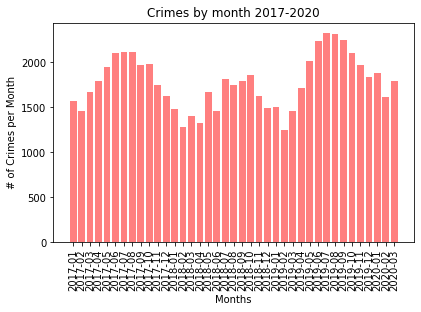

In [214]:
# Bar chart of monthly crime rate
months = monthly_crime_df["Month"].tolist()
crimes = monthly_crime_df["CrimeCount"].tolist()

x_axis = np.arange(len(months))
plt.bar(x_axis, crimes, color='r', alpha=0.5, align="center")
plt.xlabel("Months")
plt.ylabel("# of Crimes per Month")
tick_locations = [month for month in x_axis]
plt.title("Crimes by month 2017-2020")
plt.tight_layout()
plt.xticks(tick_locations, months, rotation=90);
plt.savefig("Output/MonthlyCrimeRate_BarChart.png", bbox_inches='tight',dpi=150)
plt.show()

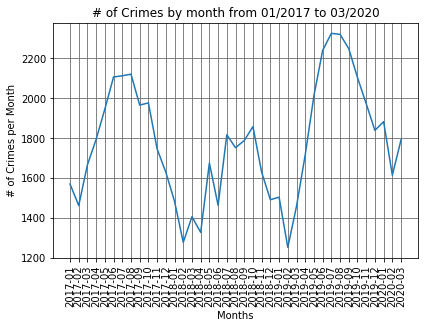

In [216]:
# Line chart of monthly crime rate
plt.plot(x_axis, crimes)
tick_locations = [month for month in x_axis]
plt.xlabel("Months")
plt.ylabel("# of Crimes per Month")
#plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, color='#666666', linestyle='-')
plt.tight_layout()
plt.title("# of Crimes by month from 01/2017 to 03/2020")
plt.xticks(tick_locations, months, rotation=90);
plt.savefig("Output/MonthlyCrimeRate_LineGraph.png", bbox_inches='tight',dpi=150)

plt.show()

In [188]:
monthly_crime_df.to_csv("Output/CrimeData_Monthly.csv", index=False, header=True)

In [189]:
crime_df.to_csv("Output/AllCrimes.csv", index=False, header=True)

In [190]:
daily_crime_df.to_csv("Output/CrimeData_Daily.csv", index=False, header=True)

In [191]:
# Read in daily crime file to parse by crime type
daily_crime = "Output/CrimeData_Daily.csv"
daily_crime_df = pd.read_csv(daily_crime, encoding="ISO-8859-1")
daily_crime_df.head()

,Day,CrimeCount
0,2017-01-01,51
1,2017-01-02,41
2,2017-01-03,71
3,2017-01-04,60
4,2017-01-05,57


In [192]:
jan2019_df = daily_crime_df.loc[daily_crime_df["Day"] >= "2019-01-01"]
jan2019_df = jan2019_df.loc[jan2019_df["Day"] < "2019-02-01"]

jul2019_df = daily_crime_df.loc[daily_crime_df["Day"] >= "2019-07-01"]
jul2019_df = jul2019_df.loc[jul2019_df["Day"] < "2019-08-01"]

#jul2019_df = daily_crime_df.loc[daily_crime_df["Day"] == "2019-07"]
#jan2019_df
jul2019_df


,Day,CrimeCount
911,2019-07-01,99
912,2019-07-02,74
913,2019-07-03,72
914,2019-07-04,44
915,2019-07-05,77
916,2019-07-06,66
917,2019-07-07,74
918,2019-07-08,106
919,2019-07-09,84
920,2019-07-10,84


In [234]:
# group crimes by month/offense, do a line chart to trend the 
# individual crime types
crime_monthly_type_df = pd.DataFrame({"Offense": crime_df["Offense"],
                                     "ReportedYearMonth": crime_df["ReportedYearMonth"]})
crime_monthly_type_df.head()

,Offense,ReportedYearMonth
0,Larceny,2017-04
1,Larceny,2017-04
2,Rape,2017-05
3,Larceny,2017-05
4,Robbery,2017-05


In [275]:
# Group our data by year/month and offense, with a count,
# and convert this to a dataframe
offense_by_month_df = crime_monthly_type_df.groupby(['ReportedYearMonth', 'Offense']).size().to_frame(name="NumOffenses").reset_index()
offense_by_month_df.head()

,ReportedYearMonth,Offense,NumOffenses
0,2017-01,Arson,6
1,2017-01,Assault,117
2,2017-01,Auto Theft,228
3,2017-01,Burglary,229
4,2017-01,Larceny,823


In [307]:
# Group our data by offense, with a count,
# and convert this to a dataframe
offense_df = crime_monthly_type_df.groupby(['Offense']).size().to_frame(name="NumOffenses").reset_index()
offense_df

,Offense,NumOffenses
0,Arson,259
1,Assault,5741
2,Auto Theft,8168
3,Burglary,10508
4,Larceny,38889
5,Murder,106
6,Rape,1163
7,Robbery,4474


In [308]:
# Setup Arson df for plotting
arson = offense_by_month_df['Offense']=='Arson'
arson_df = offense_by_month_df[arson]
arson_df.head()

,ReportedYearMonth,Offense,NumOffenses
0,2017-01,Arson,6
8,2017-02,Arson,4
15,2017-03,Arson,5
23,2017-04,Arson,5
30,2017-05,Arson,15


In [309]:
# Setup Assault df for plotting
assault = offense_by_month_df['Offense']=='Assault'
assault_df = offense_by_month_df[assault]
assault_df.head()

,ReportedYearMonth,Offense,NumOffenses
1,2017-01,Assault,117
9,2017-02,Assault,97
16,2017-03,Assault,136
24,2017-04,Assault,180
31,2017-05,Assault,189


In [310]:
# setup Auto Theft df 
auto_theft = offense_by_month_df['Offense']=='Auto Theft'
auto_theft_df = offense_by_month_df[auto_theft]
auto_theft_df.head()

,ReportedYearMonth,Offense,NumOffenses
2,2017-01,Auto Theft,228
10,2017-02,Auto Theft,185
17,2017-03,Auto Theft,143
25,2017-04,Auto Theft,165
32,2017-05,Auto Theft,159


In [311]:
# setup Burglary df 
burglary = offense_by_month_df['Offense']=='Burglary'
burglary_df = offense_by_month_df[burglary]
burglary_df.head()

,ReportedYearMonth,Offense,NumOffenses
3,2017-01,Burglary,229
11,2017-02,Burglary,222
18,2017-03,Burglary,287
26,2017-04,Burglary,297
33,2017-05,Burglary,307


In [312]:
# setup Larceny df 
larceny = offense_by_month_df['Offense']=='Larceny'
larceny_df = offense_by_month_df[larceny]
larceny_df.head()

,ReportedYearMonth,Offense,NumOffenses
4,2017-01,Larceny,823
12,2017-02,Larceny,814
19,2017-03,Larceny,945
27,2017-04,Larceny,994
34,2017-05,Larceny,1080


In [330]:
# setup Murder df 
murder = offense_by_month_df['Offense']=='Murder'
murder_df = offense_by_month_df[murder]
murder_df.set_index("ReportedYearMonth", inplace=True)
murder_df.head()

,Offense,NumOffenses
ReportedYearMonth,,
2017-01,Murder,4
2017-03,Murder,1
2017-05,Murder,4
2017-06,Murder,5
2017-07,Murder,2


In [314]:
# setup Rape df 
rape = offense_by_month_df['Offense']=='Rape'
rape_df = offense_by_month_df[rape]
rape_df.head()

,ReportedYearMonth,Offense,NumOffenses
6,2017-01,Rape,33
13,2017-02,Rape,24
21,2017-03,Rape,33
28,2017-04,Rape,23
36,2017-05,Rape,36


In [315]:
# setup Robbery df 
robbery = offense_by_month_df['Offense']=='Robbery'
robbery_df = offense_by_month_df[robbery]
robbery_df.head()

,ReportedYearMonth,Offense,NumOffenses
7,2017-01,Robbery,129
14,2017-02,Robbery,115
22,2017-03,Robbery,115
29,2017-04,Robbery,129
37,2017-05,Robbery,155


C:\Users\Joe\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


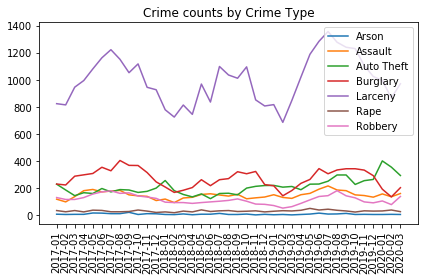

In [318]:
months = arson_df["ReportedYearMonth"].tolist()	   

arson_count = arson_df["NumOffenses"].tolist()
assault_count = assault_df["NumOffenses"].tolist()
auto_theft_count = auto_theft_df["NumOffenses"].tolist()
burglary = burglary_df["NumOffenses"].tolist()
larceny = larceny_df["NumOffenses"].tolist()
murder = murder_df["NumOffenses"].tolist()
rape = rape_df["NumOffenses"].tolist()
robbery = robbery_df["NumOffenses"].tolist()

x_axis1 = np.arange(len(months))
tick_locations = [month for month in x_axis1]
plt.xticks(tick_locations, months, rotation=90);

ax1 = plt.subplot(111)
ax1.plot(x_axis1, arson_count, label='Arson')
ax1.plot(x_axis1, assault_count, label='Assault')
ax1.plot(x_axis1, auto_theft_count, label='Auto Theft')
ax1.plot(x_axis1, burglary, label='Burglary')
ax1.plot(x_axis1, larceny, label='Larceny')
#ax1.plot(x_axis1, murder, label='Murder')
ax1.plot(x_axis1, rape, label='Rape')
ax1.plot(x_axis1, robbery, label='Robbery')

plt.title('Crime counts by Crime Type')
#ax1.legend(loc='best', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
ax1.legend()


plt.tight_layout()
plt.savefig("Output/CrimeRateByCrime_LineGraph.png", bbox_inches='tight',dpi=150)
plt.show()
#plt.plot(x_axis, arson_count)


